# Suhani's Spotify Wrapped
This is my personal project where I explore my Spotify data for the years 2022 to 2023 and try and understand what I can about my own data and song preferences. 

First we import a few packages: 

In [1]:
import json
import csv
import pandas as pd
import babypandas as bpd
import numpy as np

## File Background Information
I downloaded this information from my Spotify account. For the record this is only the last couple of years because it is not the comprehensive data download. 
As I have been using Spotify since 2018 I anticipate that it will take longer for them to get that information to me. 
'streaming0' contains all the information from the end of the 2022 collection year. This spans from November 30th, 2022 up until October 25th, 2023. <br>
'streaming1' contains everything I have listened to since October 25th, 2023 until December 1st, 2023 which would coincide with the date that this data was delivered to me.

In [2]:
streaming1 = pd.read_json('StreamingHistory1.json')
streaming1.to_csv('Streaming1.csv')
streaming0 = pd.read_json('StreamingHistory0.json')
streaming0.to_csv('Streaming0.csv')

Below we see the two data frames. The first thing I notice is that 'streaming0' seems to stop at 10,000 rows which I find interesting that it is a rounded number. I do not know if that is a conincidence or a specific choice by Spotify in how they package the 'abridged' data package. 

In [3]:
streaming0

,endTime,artistName,trackName,msPlayed
0,2022-11-30 20:22,Little Mix,No,181587
1,2022-12-01 09:47,BTS,Run BTS,204939
2,2022-12-01 09:48,SF9,O Sole Mio,17287
3,2022-12-01 09:51,TOMORROW X TOGETHER,Good Boy Gone Bad,191038
4,2022-12-01 09:54,NCT DREAM,BOOM,195080
...,...,...,...,...
9995,2023-10-25 22:36,KAI,Rover,174506
9996,2023-10-25 22:39,MONSTA X,WHO DO U LOVE? (feat. French Montana),189035
9997,2023-10-25 22:42,BLACKPINK,PLAYING WITH FIRE,197288
9998,2023-10-25 22:43,JENNIE,You & Me,37441


In [4]:
streaming1

,endTime,artistName,trackName,msPlayed
0,2023-10-25 23:03,MONSTA X,WHO DO U LOVE? (feat. French Montana),26476
1,2023-10-26 01:56,KAI,Rover,174506
2,2023-10-26 01:59,MONSTA X,WHO DO U LOVE? (feat. French Montana),189035
3,2023-10-26 02:02,JENNIE,You & Me,15312
4,2023-10-26 02:02,BLACKPINK,PLAYING WITH FIRE,197288
...,...,...,...,...
3284,2023-12-01 20:44,Beyoncé,Deja Vu (feat. Jay-Z) - Homecoming Live,289790
3285,2023-12-01 20:47,Beyoncé,Deja Vu (feat. Jay-Z) - Homecoming Live,158360
3286,2023-12-01 20:57,Beyoncé,Deja Vu (feat. Jay-Z) - Homecoming Live,5560
3287,2023-12-01 22:56,Beyoncé,Deja Vu (feat. Jay-Z) - Homecoming Live,284529


To make it easier to work with these data frames I am going to combine them into a single data frame that I will call 'streaming' so that it represents the entire listening year for 2023. <br> First I define a list of both the data frame names to contain both years. Then we define the new data frame as the concatenation of the list of data frames stored in 'both_years'. <br> Note: The order of the data frame are listed such that the new data frame remains in chronological order.

In [5]:
both_years = [streaming0, streaming1]
streaming = pd.concat(both_years)

Now we can see all the songs I have listened to since November 30th, 2022. 

In [6]:
streaming

,endTime,artistName,trackName,msPlayed
0,2022-11-30 20:22,Little Mix,No,181587
1,2022-12-01 09:47,BTS,Run BTS,204939
2,2022-12-01 09:48,SF9,O Sole Mio,17287
3,2022-12-01 09:51,TOMORROW X TOGETHER,Good Boy Gone Bad,191038
4,2022-12-01 09:54,NCT DREAM,BOOM,195080
...,...,...,...,...
3284,2023-12-01 20:44,Beyoncé,Deja Vu (feat. Jay-Z) - Homecoming Live,289790
3285,2023-12-01 20:47,Beyoncé,Deja Vu (feat. Jay-Z) - Homecoming Live,158360
3286,2023-12-01 20:57,Beyoncé,Deja Vu (feat. Jay-Z) - Homecoming Live,5560
3287,2023-12-01 22:56,Beyoncé,Deja Vu (feat. Jay-Z) - Homecoming Live,284529


## My Listening History with BTS

BTS has been one of my all-time favorite artists consistently over the past few years. The reason I downloaded Spotify at all was to be able to listen to their music while also multi-tasking. <br>
Until I get more data this will just be my initial exploration of what I can do with this information and then we can do a more comprehensive review once I get my extended data package. <br>
I intend to get a better understanding of the amount of time I spend listening to BTS songs. 

First I query out all the times I listened to BTS:

In [7]:
bts = streaming[streaming['artistName']=='BTS']

The following code determines the number of rows in the bts dataframe which is equivalent to the number of times I have listened to any BTS song. 

In [8]:
total_bts = bts.shape[0]
print('The number of times I have listened to any BTS song is: ' + str(total_bts))

The number of times I have listened to any BTS song is: 1095


This line tells me the number of different BTS songs I have listened to.

In [9]:
num_unique = len(bts['trackName'].unique())
print('Over the last 2 years I have listened to ' + str(num_unique) + ' different BTS songs.')

Over the last 2 years I have listened to 112 different BTS songs.


Now I am curious to determine the number of hours I have spent listening to BTS songs. This can be done by querying out the 'msPlayed' column and converting its sum from milliseconds into hours. <br>
Note: I have created intermediate variables of 'total_s' and 'total_min' in case they become useful later. 

In [26]:
#First we query out the number of miliseconds played.
total_ms = bts['msPlayed'].sum()

#Then we do the following math to determine how many hours 
total_s = total_ms * 0.001
total_min = total_s / 60
total_hrs = total_min / 60

#I will round to two decimal places.
rounded_total_min = np.round(total_min, 1)
rounded_total_hrs = np.round(total_hrs, 2)

print('I have spent about ' + str(rounded_total_min) + ' minutes listening to BTS in the last year.')
print('This is equivalent to about ' + str(int(np.round(rounded_total_hrs))) + ' hours and 2 minutes of BTS in this time frame.')

I have spent about 3122.6 minutes listening to BTS in the last year.
This is equivalent to about 52 hours and 2 minutes of BTS in this time frame.


Now I want to see the distribution of the BTS songs I listened to. First we are going to group the data frame by each song and count the number of times it was played. I'll assign a new column for the number of times each song is played and create a data frame of just the song counts called 'song_counts'.

In [41]:
grouped_by_song = bts.groupby('trackName').count()
song_counts = grouped_by_song.assign(timesPlayed = by_song['endTime'])
song_counts = song_counts.sort_values('timesPlayed', ascending=False)
song_counts = song_counts.get(['timesPlayed']).reset_index()
song_counts

,trackName,timesPlayed
0,Black Swan,49
1,dimple,38
2,Filter,34
3,Run BTS,33
4,Jamais Vu,31
...,...,...
107,N.O,1
108,Outro: Luv in Skool,1
109,Outro: Wings,1
110,Permission to Dance,1


I notice that there are quite a few songs that I only listened to once so I'm going to create a list of song titles that I have only listened to one time. 

In [54]:
one_listen = song_counts[song_counts.get('timesPlayed') == 1]
one_listen = one_listen['trackName']
num_one_listen = one_listen.shape[0]
print('The number of songs I have listened to only once is ' + str(num_one_listen)+ '.')
print(one_listen)

The number of songs I have listened to only once is 28.
84       Skit: Expectation!
85           Skit: Soulmate
86                 Tomorrow
87     Skit: R U Happy Now?
88                     Stay
               ...         
107                     N.O
108     Outro: Luv in Skool
109            Outro: Wings
110     Permission to Dance
111            Just One Day
Name: trackName, Length: 28, dtype: object


Now I can transform the information such that we can create a pie chart of the amount of times I have listened to the various BTS songs. <br>
We know that the last 28 songs in our data frame were only listened to one time so we can query out the trackName and timesPlayed series and adjust them to put those 28 songs into a category called 'Other'. 

In [58]:
num_tracks = song_counts.shape[0]
tracks = song_counts['trackName']
tracks = tracks[:num_tracks-num_one_listen]
tracks = np.append(tracks, 'Other')
print(tracks)
plays = song_counts['timesPlayed']
plays = plays[:num_tracks-num_one_listen]
plays = np.append(plays, num_one_listen)
print(plays)

['Black Swan' 'dimple' 'Filter' 'Run BTS' 'Jamais Vu' 'I Need U'
 'Make It Right' 'FAKE LOVE' 'Friends' 'Best Of Me'
 'Heartbeat (BTS World Original Soundtrack)' 'ON' 'Mikrokosmos'
 'Pied Piper' 'Save Me' 'Love Maze' 'Go Go' 'HOME' 'Spine Breaker' 'IDOL'
 'Run' 'Answer : Love Myself' 'Converse High' 'BTS Cypher 4'
 'Intro: Singularity' 'Lights' 'Boy With Luv (feat. Halsey)'
 'Intro: Serendipity' 'We are Bulletproof : the Eternal' 'Euphoria'
 'House of Cards - Full Length Edition' 'Outro: Her' 'Trivia 承 : Love'
 'A Supplementary Story: You Never Walk Alone' '21st Century Girl'
 'Epilogue: Young Forever' 'Louder than bombs' 'Trivia 起 : Just Dance'
 'Trivia 轉 : Seesaw' 'MIC Drop (Steve Aoki Remix) - Full Length Edition'
 'Silver Spoon' 'The Truth Untold (feat. Steve Aoki)' 'Epiphany'
 'Spring Day' "I'm Fine" 'Outro: Tear' 'Not Today' 'My Time' 'Anpanman'
 'Butterfly' 'Burning Up (Fire)' 'Life Goes On' 'Telepathy' 'Jump'
 'Butter' 'Dionysus' 'Blood Sweat & Tears' 'DNA' 'Airplane pt.2'
 'BT

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 25215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 36215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 36681 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 25215 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 36215 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 36681 missing from current font.
  font.set_text

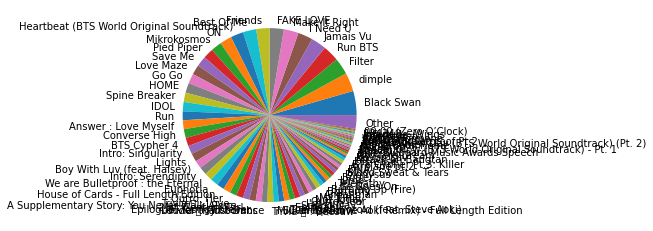

In [59]:
plt.pie(plays, labels = tracks)
plt.show()

Now I notice that this chart is quite difficult to follow just given the sheer number of songs that are included. So we are going to adjust my strategy to a bar chart instead. 

Text(0.0, 1.0, 'BTS Songs vs Times Played')

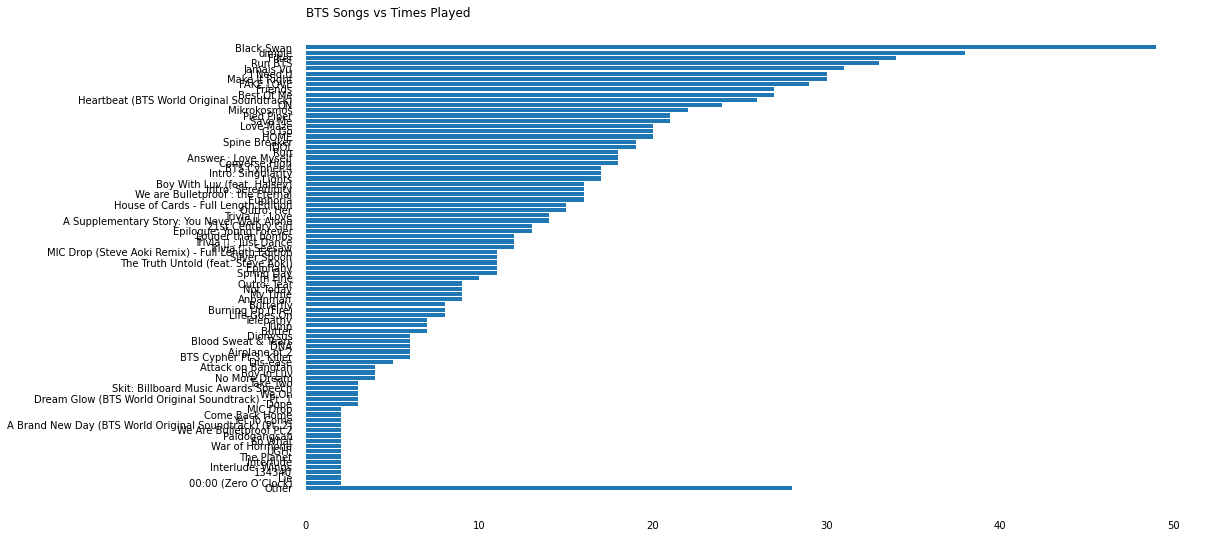

In [60]:
tracks
plays

fig, ax = plt.subplots(figsize =(16, 9))

ax.barh(tracks, plays)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.invert_yaxis()

ax.set_title('BTS Songs vs Times Played',
             loc ='left', )

In [ ]:
# # Read CSV into pandas
# data = pd.read_csv(r"cars.csv")
# data.head()
# df = pd.DataFrame(data)
 
# name = df['car'].head(12)
# price = df['price'].head(12)
 
# # Figure Size
# fig, ax = plt.subplots(figsize =(16, 9))
 
# # Horizontal Bar Plot
# ax.barh(name, price)
 
# # Remove axes splines
# for s in ['top', 'bottom', 'left', 'right']:
#     ax.spines[s].set_visible(False)
 
# # Remove x, y Ticks
# ax.xaxis.set_ticks_position('none')
# ax.yaxis.set_ticks_position('none')
 
# # Add padding between axes and labels
# ax.xaxis.set_tick_params(pad = 5)
# ax.yaxis.set_tick_params(pad = 10)
 
# # Add x, y gridlines
# ax.grid(b = True, color ='grey',
#         linestyle ='-.', linewidth = 0.5,
#         alpha = 0.2)
 
# # Show top values 
# ax.invert_yaxis()
 
# # Add annotation to bars
# for i in ax.patches:
#     plt.text(i.get_width()+0.2, i.get_y()+0.5, 
#              str(round((i.get_width()), 2)),
#              fontsize = 10, fontweight ='bold',
#              color ='grey')
 
# #Add Plot Title
# ax.set_title('Sports car and their price in crore',
#              loc ='left', )
 
# # Add Text watermark
# fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
#          color ='grey', ha ='right', va ='bottom',
#          alpha = 0.7)
 
# # Show Plot
# plt.show()

In [12]:
#I'm curious to see if we can figure out which album is my favorite
#I think I can start by making lists of all the albums and their songs 
#a dictionary might help here where the keys are album names and the values are lists of song titles 
#and then write a function to determine which album each song is 
#apply that function to the track name and then create a new column of just album 

In [ ]:
#BACK LOG OF UNUSED CODE
# def pie_chart_lists(dataframe):
#     output = []
#     track = []
#     #For the purposes of this function we're going to assume the dataframe is in the same format as song_counts
#     tracks = dataframe['trackName']
#     plays = dataframe['timesPlayed']
#     reps = dataframe.shape[0]
#     for i in range(reps): 